<a href="https://colab.research.google.com/github/Lauchnor/cs130-intro/blob/main/Project_2_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2: Image manipulation and compression
## Run this first:

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from PIL import Image
import random

# Image Compression

In this activity, our goal will be to see if we can represent an image (the BC Eagles logo) using fewer pieces of information than what are in the original image.
The parameter k will represent the rank of the compressed matrix.

Run the code block above to get started.

Before running the code block below, you need to upload the image file (click the folder icon to the left to upload it from your downloads folder.) When the image is uploaded, the code below should run.

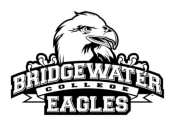

In [7]:
image = Image.open('eagles.png')  #TODO: upload this image from your downloads folder using the folder icon to the left.
plt.subplots(figsize=(2, 2))      # chooses size of plot
plt.axis('off')                    # turns off axis numbering
plt.imshow(image, cmap=plt.cm.gray ) # plots the image
im_array = np.asarray(image)    #converts it to an np array
img = im_array[:, :, 1]         #converts it to 2D array
height = img.shape[0]
width = img.shape[1]

Run every code block in order. Some need you to fill in some information.

In [21]:
#write a function that takes in the height and width of an image and outputs how many elements are in the array.
#This will indicate how many pieces of information it takes to represent the image.
def elements(h, w):
  return h*w  ## TODO: fill this in

In [22]:
%pip install -U ipytest
import ipytest
ipytest.autoconfig()

Use this code to check that your elements function works properly:

In [23]:
%%ipytest
def test_elements():   #test harness for elements()
    h,w = 10,20
    assert elements(h,w) == 200
    h,w = 200,100
    assert elements(h,w) == 20000

.                                                                                            [100%]
1 passed in 0.01s


## Array Slicing Practice
Fill in the array slicing for the variable sliced_image to show only the top half of the image. To figure out how many rows or columns are in the array, I've printed the height and width.

In [ ]:
height, width

(505, 732)

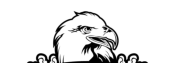

In [28]:
plt.subplots(figsize=(2, 2))            # choose size of plot
plt.axis('off')                         # turn off axis numbering
sliced_image = img[0:253,:]  #TODO: you fill this in
plt.imshow(sliced_image, cmap=plt.cm.gray )   # plot the image


Check that you see only the eagle's head, no text.

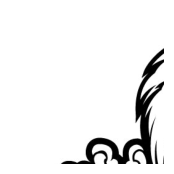

In [29]:
plt.subplots(figsize=(2, 2)) # choose size of plot
plt.axis('off') # turn off axis numbering
sliced_image = img[:250, :250]
plt.imshow(sliced_image, cmap=plt.cm.gray ) # plot the image

(a) The code above should generate an image.  

When satisfied, please run the code chunk below to prepare for the next section.



## Matrix Reconstruction

We are now going to represent each faces matrix in a compressed way. Recall that we can take the full matrix, represented this way:

$$ M = U S V^T,$$

But we will slice off parts of these matrices to keep only the most important parts.  This produces smaller matrices, U', S' and V':

$$ M = U' S' V'^T. ~~~~(approximately)$$

This allows M to be represented in a compressed way, but you'll find that if you slice off too much of each matrix, the reconstructed image won't be a good match to the original.

(b) Fill in the blanks to achieve the following slicing:

In S, keep the top k rows and top k columns

In U, keep all the rows and only the top k columns

In V, keep all the columns and only the top k rows

In [35]:
%%ipytest
# Returns the best rank-k approximation to M
def reconstruct(M, k):
    U, S_values, V = np.linalg.svd(M, full_matrices=False)
    S = np.diag(S_values)
    Sprime = S[0:k,0:k]
    Uprime = U[:,0:k]
    Vprime = V[0:k,:]    #TODO: Please fix this to keep all columns but only the first k rows.
    elements_in_U = elements(Uprime.shape[0], Uprime.shape[1])
    elements_in_S = elements(Sprime.shape[0], Sprime.shape[1])
    elements_in_V = elements(Vprime.shape[0], Vprime.shape[1])
    total_elements = elements_in_U + elements_in_S + elements_in_V
    return np.dot(np.dot(Uprime,Sprime),Vprime), total_elements #approximation of M

def test_slicing():
  m = np.matrix('1 2 3; 3 4 5; 6 7 8') # matrix for testing purposes
  m_reconstructed = reconstruct(m,1)[0] # call the reconstruction function with k = 1
  m_correct_result = np.matrix('1.68331528 2.07660348 2.46989168; 3.26667312 4.02989556 4.79311799;5.64170987 6.95983366 8.27795746')
  print(m_reconstructed)
  assert np.allclose(m_reconstructed, m_correct_result)

.                                                                                            [100%]
1 passed in 0.01s


You should see "1 passed " as the result of running the code above. If your slicing is incorrect, the pytest will tell you that the assertion failed, or you'll get some other error. When your function definition passes the test, continue.

The following test uses a larger matrix. With k = 6, the reconstruction should be so similar to the original matrix that it should pass this unit test. If it doesn't, please fix your code for "def reconstruct(M, k)."  

In [36]:
%%ipytest
# Don't change anything in this code block until your function passes this test

def test_reconstruction():  # tests definition of reconstruct()
  random.seed(10)
  test_matrix = np.random.randn(9, 6)
  k = 6  #once it passes the test, you can change this value.

  # check that matrices are almost identical
  assert np.allclose(test_matrix, reconstruct(test_matrix,k)[0])


.                                                                                            [100%]
1 passed in 0.02s




(c) At this point, your code should have successfully passed these tests.

The following code compresses the image by representing it using rank k matrices.

Number of elements in original: 369660


<Figure size 1200x1200 with 0 Axes>

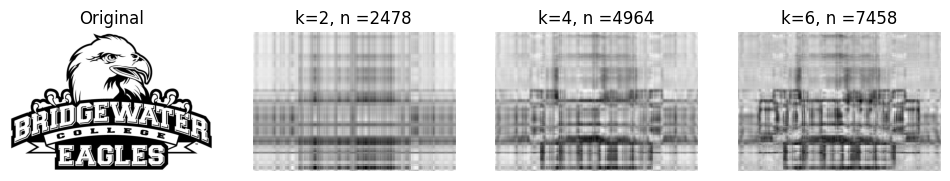

<Figure size 1200x1200 with 0 Axes>

In [38]:
reconstructed_list = [img]
k_list = [0]
n_list=[0]
print("Number of elements in original:", elements(height, width))
for k in range(2,8,2): #TODO: you can change this range (in a new code chunk)
    M = img#select the image
    A, n_elements = reconstruct(M,k) #reconstruct the image
    reconstructed_list.append(A)
    k_list.append(k)
    n_list.append(n_elements)
n_images = len(reconstructed_list) #includes the original as the first one
plt.figure(figsize=(12, 12))

for k in range(len(k_list)):
    ax = plt.subplot(1,n_images,k+1)
    plt.axis('off') # turn off axis numbering
    plt.imshow(reconstructed_list[k], cmap=plt.cm.gray)
    if k>0:
      ax.set_title(f"k={k_list[k]}, n ={n_list[k]}")
    if k==0: ax.set_title("Original")

Notice that this appears in the code:
range(2,8,2)

This means, "start with k = 2, go up in steps of 2 and stop before you hit 8."  Copy-paste the entire code block into a new code chunk below so we can try a different range but retain the images you've already generated. Change the range so that it starts at k = 2, goes up in steps of 5, and the last image is k = 22. Make sure that k = 22 is included.

Number of elements in original: 369660


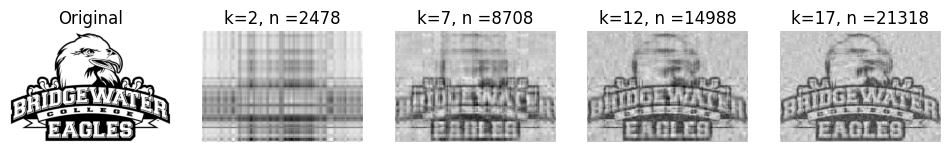

In [44]:
#insert your code block here.
reconstructed_list = [img]
k_list = [0]
n_list=[0]
print("Number of elements in original:", elements(height, width))
for k in range(2,22,5): #TODO: you can change this range (in a new code chunk)
    M = img#select the image
    A, n_elements = reconstruct(M,k) #reconstruct the image
    reconstructed_list.append(A)
    k_list.append(k)
    n_list.append(n_elements)
n_images = len(reconstructed_list) #includes the original as the first one
plt.figure(figsize=(12, 12))

for k in range(len(k_list)):
    ax = plt.subplot(1,n_images,k+1)
    plt.axis('off') # turn off axis numbering
    plt.imshow(reconstructed_list[k], cmap=plt.cm.gray)
    if k>0:
      ax.set_title(f"k={k_list[k]}, n ={n_list[k]}")
    if k==0: ax.set_title("Original")

The original matrix has 369660 elements. Your compressed images show how many elements are in them in the plot title. n = 2478 means that the compressed image has many fewer elements than the original. However, the compressed images come out gray and fuzzy, maybe because the original image is black and white, not grayscale. Let's grab the last image and see if we can improve the contrast.

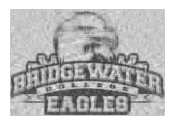

In [45]:
 #grab the last reconstructed image
M = reconstructed_list[-1]
plt.subplots(figsize=(2, 2)) # choose size of plot
plt.axis('off') # turn off axis numbering
plt.imshow(M, cmap=plt.cm.gray ) # plot the image

Let's go through the image pixel by pixel. A white pixel has the value 255. A black pixel has the value 0. Set a threshold so that any pixel value above a certain value will just be turned white, and any pixel below the value will be turned black. I've provided sample code below, but you need to change the threshold value to something better.

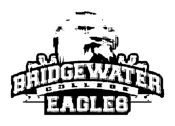

In [52]:
M_modified = np.zeros(M.shape)

max_i  = M.shape[0]
max_j = M.shape[1]
for i in range(max_i):  #go through every row
  for j in range(max_j):#go through every column
    if M[i][j] > 127:   #TODO: change this
      M_modified[i][j] = 255  #change it to white
    else:
      M_modified[i][j] = 0   #change it to black
plt.subplots(figsize=(2, 2)) # choose size of plot
plt.axis('off') # turn off axis numbering
plt.imshow(M_modified, cmap=plt.cm.gray ) # plot the modified image